In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import tqdm
import numba
import pickle
import matplotlib
import numpy as np
import pandas as pd
import ase.io as aio
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from toolz.curried import pipe, curry, compose

In [3]:
import matplotlib as mpl
scale = 8
mpl.rcParams['figure.figsize'] = [scale * 1.61803398, scale]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [4]:
import utilities as utils

In [5]:
get_range = lambda x: np.max(x) - np.min(x)
gen_coords = curry(lambda x, dx: np.round(((x - np.min(x)) / (np.max(x) - np.min(x))) * dx).astype(int))

get_vals = compose(lambda df: df.values, lambda f: pd.read_csv(f))

gen_img = curry(lambda val, dx: utils.get_image(np.zeros([dx+1]*2), 
                                          gen_coords(val[:,1], dx), 
                                          gen_coords(val[:,2], dx), 
                                          val[:,3]))

In [19]:
flist = sorted(glob.glob("../new-data/CK_Cu_ACC_SAED_CSV/*.csv"))

csv = pd.read_csv(flist[0])
print(len(csv))


pt0 = csv["Points:0"]
pt1 = csv["Points:1"]
pt2 = csv["Points:2"]
print(get_range(pt0))
print(get_range(pt1))
print(get_range(pt2))

5052927
0.019609
2.498
2.498


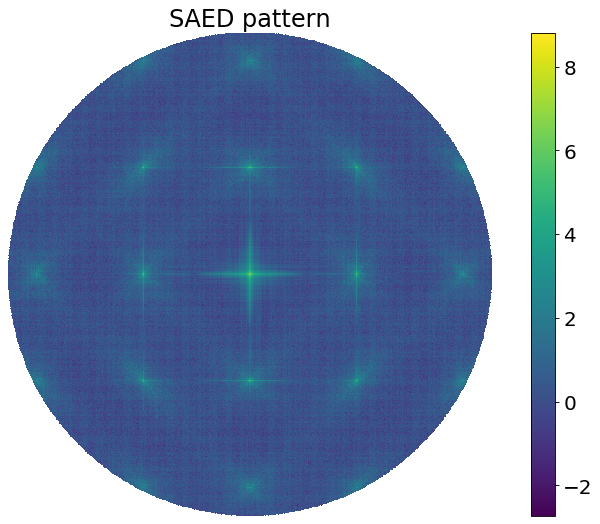

In [11]:
flist = sorted(glob.glob("../new-data/CK_Cu_ACC_SAED_CSV/*.csv"))

dx = 256

fname = flist[0]
arr = gen_img(get_vals(fname), dx=1024)
utils.draw_im(np.log10(arr), 
              "SAED pattern")

# save SAED patterns

In [12]:
if not os.path.exists("saed"):
    os.mkdir("saed")

In [17]:
dx=1024

flist = sorted(glob.glob("../new-data/CK_Cu_ACC_SAED_CSV/*.csv"))

get_fout = lambda f_in: os.path.join("saed", f_in.split("/")[-1][:-4]+"_{}.pkl".format(dx))

for fname in tqdm.tqdm_notebook(flist):
    utils.save_file(get_fout(fname), 
                    gen_img(get_vals(fname), dx=dx))